In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling

In [2]:
raw_data = pd.read_csv('/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv')

It's always a good idea to get a dataset overview first. Kaggle built-in analysis is decent for this, but I like to get several overviews, and will start with pandas_profiling report:

In [3]:
raw_data.profile_report()

We can see we have lots of correlations in our dataset, for example, income correlates with most other columns.
We can also see that Personal Loan correlates with other columns fairly strongly, which means we can expect decent accuracy from our predictive model.

Speaking of models, let's try to do a simple random forest. It's great because we don't need to scale data for it, unlike neural networks, so we can just straight up proceed to train our model.

First, let's split data into train and test set, like this:

In [4]:
from sklearn.model_selection import train_test_split
X = raw_data.drop(['Personal Loan', 'ID'], axis=1)
Y = raw_data['Personal Loan']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Let's see how well our model works on test data.

Accuracy: 0.983
Precision:0.946
Recall: 0.843


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

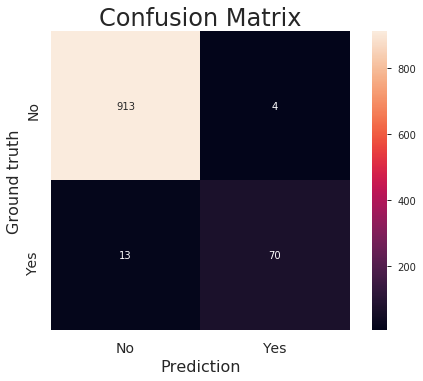

In [6]:
predictions = model.predict(X_test)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
ac = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
print(f'Accuracy: {ac:.3}\nPrecision:{precision:.3}\nRecall: {recall:.3}')
cm = confusion_matrix(Y_test, predictions)
labels = ['No', 'Yes']
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, square=True, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=24)
plt.ylabel('Ground truth', fontsize=16)
plt.xlabel('Prediction', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

This result is incredibly good.
In fact, it's so good I suspect we have a leak in our dataset. Let's see what are the most important features.

In [7]:
feature_dict = {
    'feature': X_train.columns,
    'importance': model.feature_importances_
}
feature_df = pd.DataFrame(feature_dict)
feature_df.sort_values(by='importance', ascending=False)

feature  importance
2               Income    0.352662
6            Education    0.196487
5                CCAvg    0.153355
4               Family    0.101343
9           CD Account    0.049694
0                  Age    0.034021
3             ZIP Code    0.033298
1           Experience    0.032699
7             Mortgage    0.029876
11          CreditCard    0.006696
10              Online    0.005921
8   Securities Account    0.003948

Since I don't see how income can leak the target value, I am forced to conclude that maybe our dataset really does have such strong correlations.